In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
all_eq = pd.read_excel('../mf/all-equity-excluding-sector-funds-2022.xlsx', skiprows=5, index_col=0)

In [6]:
all_eq

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,,,,,,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,2,EQ-FLX,0.74,2019-02-11 00:00:00,658,1.8,Below Average,Low,Very High,19.27,...,0.94,--,--,--,--,--,--,16.29,14.24,1.79
Aditya Birla Sun Life Equity Advantage Fund - Direct Plan,1,EQ-L&MC,1.11,2013-01-01 00:00:00,5216,10.0,High,Low,Very High,24.96,...,0.92,60.96,5.83,9.72,43.66,-12.66,9.87,19.42,39.46,-12.23
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,3,EQ-FLX,0.9,2013-01-01 00:00:00,16192,10.0,Above Average,Average,Very High,23.73,...,0.97,58.03,3.87,16.24,35.07,-3.01,9.53,17.11,31.38,-0.27
Aditya Birla Sun Life Focused Equity Fund - Direct Plan,3,EQ-LC,0.87,2013-01-01 00:00:00,5875,10.0,Average,Average,Very High,21.98,...,0.98,50.21,0.84,7.92,32.56,-3.03,12.23,17.05,27.85,1.42
Aditya Birla Sun Life Frontline Equity Fund - Direct Plan,2,EQ-LC,1.03,2013-01-01 00:00:00,22063,10.0,Average,Average,Very High,22.31,...,0.99,46.04,2.01,8.49,32.04,-1.98,8.4,15.02,28.76,4.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Value Opportunities Fund - Direct Plan,4,EQ-VAL,1.19,2013-01-01 00:00:00,7018,5.0,Below Average,Average,Very High,22.13,...,0.95,42.32,-5.24,3.34,30.05,-1.67,11.11,19.8,31.35,5.04
WhiteOak Capital Flexi Cap Fund - Direct Plan,--,EQ-FLX,0.55,2022-08-02 00:00:00,972,0.5,--,--,Very High,--,...,--,--,--,--,--,--,--,--,--,--
WhiteOak Capital Large Cap Fund - Direct Plan,--,EQ-LC,--,2022-12-01 00:00:00,298,0.2,--,--,Very High,--,...,--,--,--,--,--,--,--,--,--,--


In [7]:
all_eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan to WhiteOak Capital Tax Saver Fund - Direct Plan
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 412 non-null    object 
 1   Category               412 non-null    object 
 2   Expense Ratio (%)      412 non-null    object 
 3   Launch                 412 non-null    object 
 4   Net Assets (Cr)        412 non-null    object 
 5   Fund Manager (Tenure)  412 non-null    float64
 6   Fund Risk Grade        412 non-null    object 
 7   Fund Return Grade      412 non-null    object 
 8   Riskometer             412 non-null    object 
 9   Standard Deviation     412 non-null    object 
 10  Sharpe Ratio           412 non-null    object 
 11  Sortino Ratio          412 non-null    object 
 12  Beta                   412 non-null    object 
 13  Alpha              

# Data Exploration

Convert strings to numeric values

In [8]:
all_eq['Rating'] = all_eq['Rating'].apply(pd.to_numeric, errors='coerce')

In [9]:
all_eq.iloc[:, 2:3] = all_eq.iloc[:, 2:3].apply(pd.to_numeric, errors='coerce')

In [10]:
all_eq.iloc[:, 4:6] = all_eq.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce')

In [11]:
all_eq.iloc[:, 9:] = all_eq.iloc[:, 9:].apply(pd.to_numeric, errors='coerce')

In [12]:
all_eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan to WhiteOak Capital Tax Saver Fund - Direct Plan
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 228 non-null    float64
 1   Category               412 non-null    object 
 2   Expense Ratio (%)      402 non-null    float64
 3   Launch                 412 non-null    object 
 4   Net Assets (Cr)        410 non-null    float64
 5   Fund Manager (Tenure)  412 non-null    float64
 6   Fund Risk Grade        412 non-null    object 
 7   Fund Return Grade      412 non-null    object 
 8   Riskometer             412 non-null    object 
 9   Standard Deviation     289 non-null    float64
 10  Sharpe Ratio           289 non-null    float64
 11  Sortino Ratio          289 non-null    float64
 12  Beta                   289 non-null    float64
 13  Alpha              

In [13]:
all_eq.describe()

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,228.000000,402.000000,410.000000,412.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,189.000000,196.000000,217.000000,225.000000,238.000000,256.000000,289.000000,309.000000,351.000000
mean,3.118421,0.647264,4287.034146,3.246602,22.633702,0.696021,0.795502,0.942872,0.852215,0.942422,51.859841,3.786735,5.487005,37.874578,-4.030462,8.676641,18.612907,35.839871,3.468376
std,1.086162,0.464073,10935.638585,2.819175,2.104278,0.192678,0.228896,0.080397,4.076577,0.054718,18.650495,5.943618,4.211318,9.388247,7.239575,6.516843,8.695813,12.760296,5.499929
min,1.000000,0.010000,1.000000,0.000000,13.480000,0.310000,0.340000,0.560000,-7.510000,0.590000,11.890000,-7.280000,-5.890000,5.260000,-28.630000,-23.240000,-7.980000,12.680000,-18.060000
25%,2.000000,0.292500,142.250000,1.000000,21.650000,0.580000,0.690000,0.910000,-1.020000,0.920000,38.770000,-1.267500,3.210000,30.220000,-8.162500,4.585000,14.730000,25.600000,0.525000
50%,3.000000,0.575000,689.000000,2.400000,22.500000,0.640000,0.730000,0.960000,-0.210000,0.950000,48.650000,3.510000,4.530000,37.750000,-3.865000,9.820000,16.670000,33.150000,4.020000
75%,4.000000,0.960000,3912.500000,4.525000,23.540000,0.770000,0.860000,1.000000,2.200000,0.980000,59.070000,7.592500,8.190000,43.660000,1.537500,13.332500,21.190000,41.620000,5.700000
max,5.000000,2.590000,154851.000000,14.600000,31.060000,1.480000,1.830000,1.180000,22.970000,1.000000,112.770000,22.290000,16.920000,80.440000,9.970000,29.230000,76.130000,91.730000,28.550000


In [14]:
all_eq.isnull().sum()

Rating                   184
Category                   0
Expense Ratio (%)         10
Launch                     0
Net Assets (Cr)            2
Fund Manager (Tenure)      0
Fund Risk Grade            0
Fund Return Grade          0
Riskometer                 0
Standard Deviation       123
Sharpe Ratio             123
Sortino Ratio            123
Beta                     123
Alpha                    123
R-Squared                123
2014                     223
2015                     216
2016                     195
2017                     187
2018                     174
2019                     156
2020                     123
2021                     103
2022                      61
dtype: int64

In [16]:
all_eq.groupby('Fund Risk Grade').mean().sort_values(by='Rating')

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Fund Risk Grade,,,,,,,,,,,,,,,,,,,
High,1.850000,1.006500,7523.550000,3.690000,24.851000,0.611500,0.684000,1.015000,-1.293500,0.925000,61.898750,3.740000,6.105882,43.737647,-9.599444,4.276316,12.368500,37.429500,4.669500
Above Average,2.437500,1.025417,3783.333333,3.935417,23.738125,0.668542,0.741875,0.980833,0.014375,0.946875,52.977949,4.214750,6.291500,38.987750,-6.613095,6.447273,17.323750,37.432500,3.500625
Average,3.083333,0.752857,5106.226190,4.164286,22.541310,0.689167,0.767857,0.943095,0.571905,0.949167,51.454815,3.933333,5.410781,38.709231,-4.784776,8.469189,18.431310,35.758214,3.033095
Below Average,3.685185,0.857593,6220.592593,4.198148,22.042407,0.747593,0.836667,0.904259,1.877222,0.944815,53.726389,4.890263,6.446500,38.026098,-4.154773,11.442128,21.090556,37.240741,3.492222
Low,4.500000,0.764545,8287.181818,4.304545,20.400455,0.858636,0.988636,0.831818,4.085455,0.918636,52.255882,4.445882,3.692353,34.691176,-1.300588,11.551176,24.808182,37.464091,4.210909
--,NaN,0.370575,2628.901099,2.194022,22.493770,0.650492,0.806230,0.963279,0.527541,0.941803,42.367778,1.005714,4.315385,34.529111,0.335800,9.007636,17.497049,33.213210,3.414472


In [17]:
all_eq.groupby('Fund Return Grade').mean().sort_values(by='Rating', ascending=True)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Fund Return Grade,,,,,,,,,,,,,,,,,,,
Low,1.235294,1.234706,3758.117647,2.564706,22.780588,0.500588,0.550588,0.951176,-3.544706,0.940000,58.884615,5.034286,7.035333,42.091333,-9.952667,4.076000,12.693529,26.983529,1.971176
Below Average,2.183673,0.977959,2240.816327,3.500000,22.016531,0.607143,0.677959,0.914082,-1.391429,0.946735,53.872424,3.679091,5.969143,38.304857,-7.145000,7.120465,15.824694,32.252245,1.353265
Average,3.075000,0.852875,5777.962500,4.163750,22.702250,0.684375,0.762750,0.952125,0.324125,0.955625,51.736786,4.014915,6.089841,38.577188,-4.477647,9.250833,17.449125,35.884000,3.368250
Above Average,3.851852,0.759259,8732.814815,4.612963,22.879444,0.783519,0.878704,0.937407,2.557963,0.942778,54.969000,2.916000,5.173810,38.451905,-3.438333,10.759333,21.186667,40.507037,4.214444
High,4.607143,0.627857,6133.107143,4.878571,23.259643,0.933929,1.059643,0.927857,6.374643,0.899286,50.913500,7.665000,4.650870,38.000417,-4.254000,8.009615,27.878571,45.966786,7.162857
--,NaN,0.370575,2628.901099,2.194022,22.493770,0.650492,0.806230,0.963279,0.527541,0.941803,42.367778,1.005714,4.315385,34.529111,0.335800,9.007636,17.497049,33.213210,3.414472


In [18]:
all_eq.groupby('Category').count()

,Rating,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,Sharpe Ratio,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,,,
EQ-ELSS,35,40,41,41,41,41,41,41,38,38,...,38,29,29,33,34,34,35,38,38,38
EQ-FLX,48,71,71,71,71,71,71,71,51,51,...,51,30,33,36,37,39,43,51,56,64
EQ-L&MC,24,29,29,29,29,29,29,29,25,25,...,25,18,18,20,21,21,22,25,27,28
EQ-LC,60,148,150,150,150,150,150,150,101,101,...,101,61,62,71,75,83,89,101,107,123
EQ-MC,24,41,43,43,43,43,43,43,26,26,...,26,20,21,21,21,22,23,26,28,32
EQ-MLC,0,15,18,16,18,18,18,18,8,8,...,8,6,6,6,6,7,7,8,8,13
EQ-SC,20,29,31,31,31,31,31,31,20,20,...,20,11,13,13,13,14,17,20,24,27
EQ-VAL,17,29,29,29,29,29,29,29,20,20,...,20,14,14,17,18,18,20,20,21,26


<AxesSubplot:xlabel='Fund Return Grade', ylabel='count'>

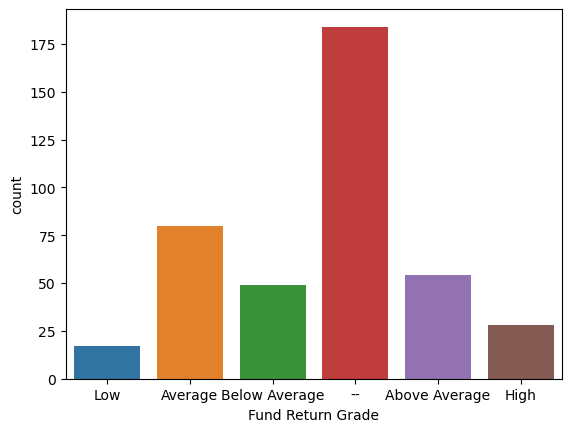

In [19]:
sns.countplot(data=all_eq, x='Fund Return Grade')

In [20]:
pd.crosstab(all_eq['Fund Return Grade'], all_eq['Fund Risk Grade'])

Fund Risk Grade,--,Above Average,Average,Below Average,High,Low
Fund Return Grade,,,,,,
--,184,0,0,0,0,0
Above Average,0,5,17,21,2,9
Average,0,21,38,15,3,3
Below Average,0,16,18,8,4,3
High,0,2,9,7,3,7
Low,0,4,2,3,8,0


<AxesSubplot:xlabel='Fund Return Grade', ylabel='Fund Risk Grade'>

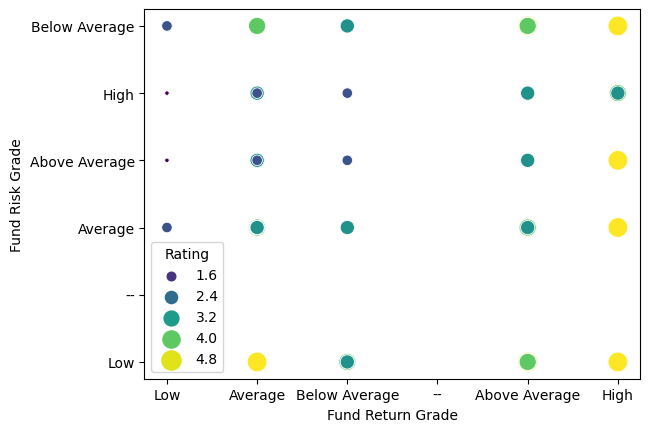

In [21]:
sns.scatterplot(data=all_eq, x='Fund Return Grade', y='Fund Risk Grade', hue='Rating', size='Rating', 
                sizes=(10, 200), palette='viridis', legend='brief')

In [22]:
num_columns = all_eq.select_dtypes('number').columns.to_list()

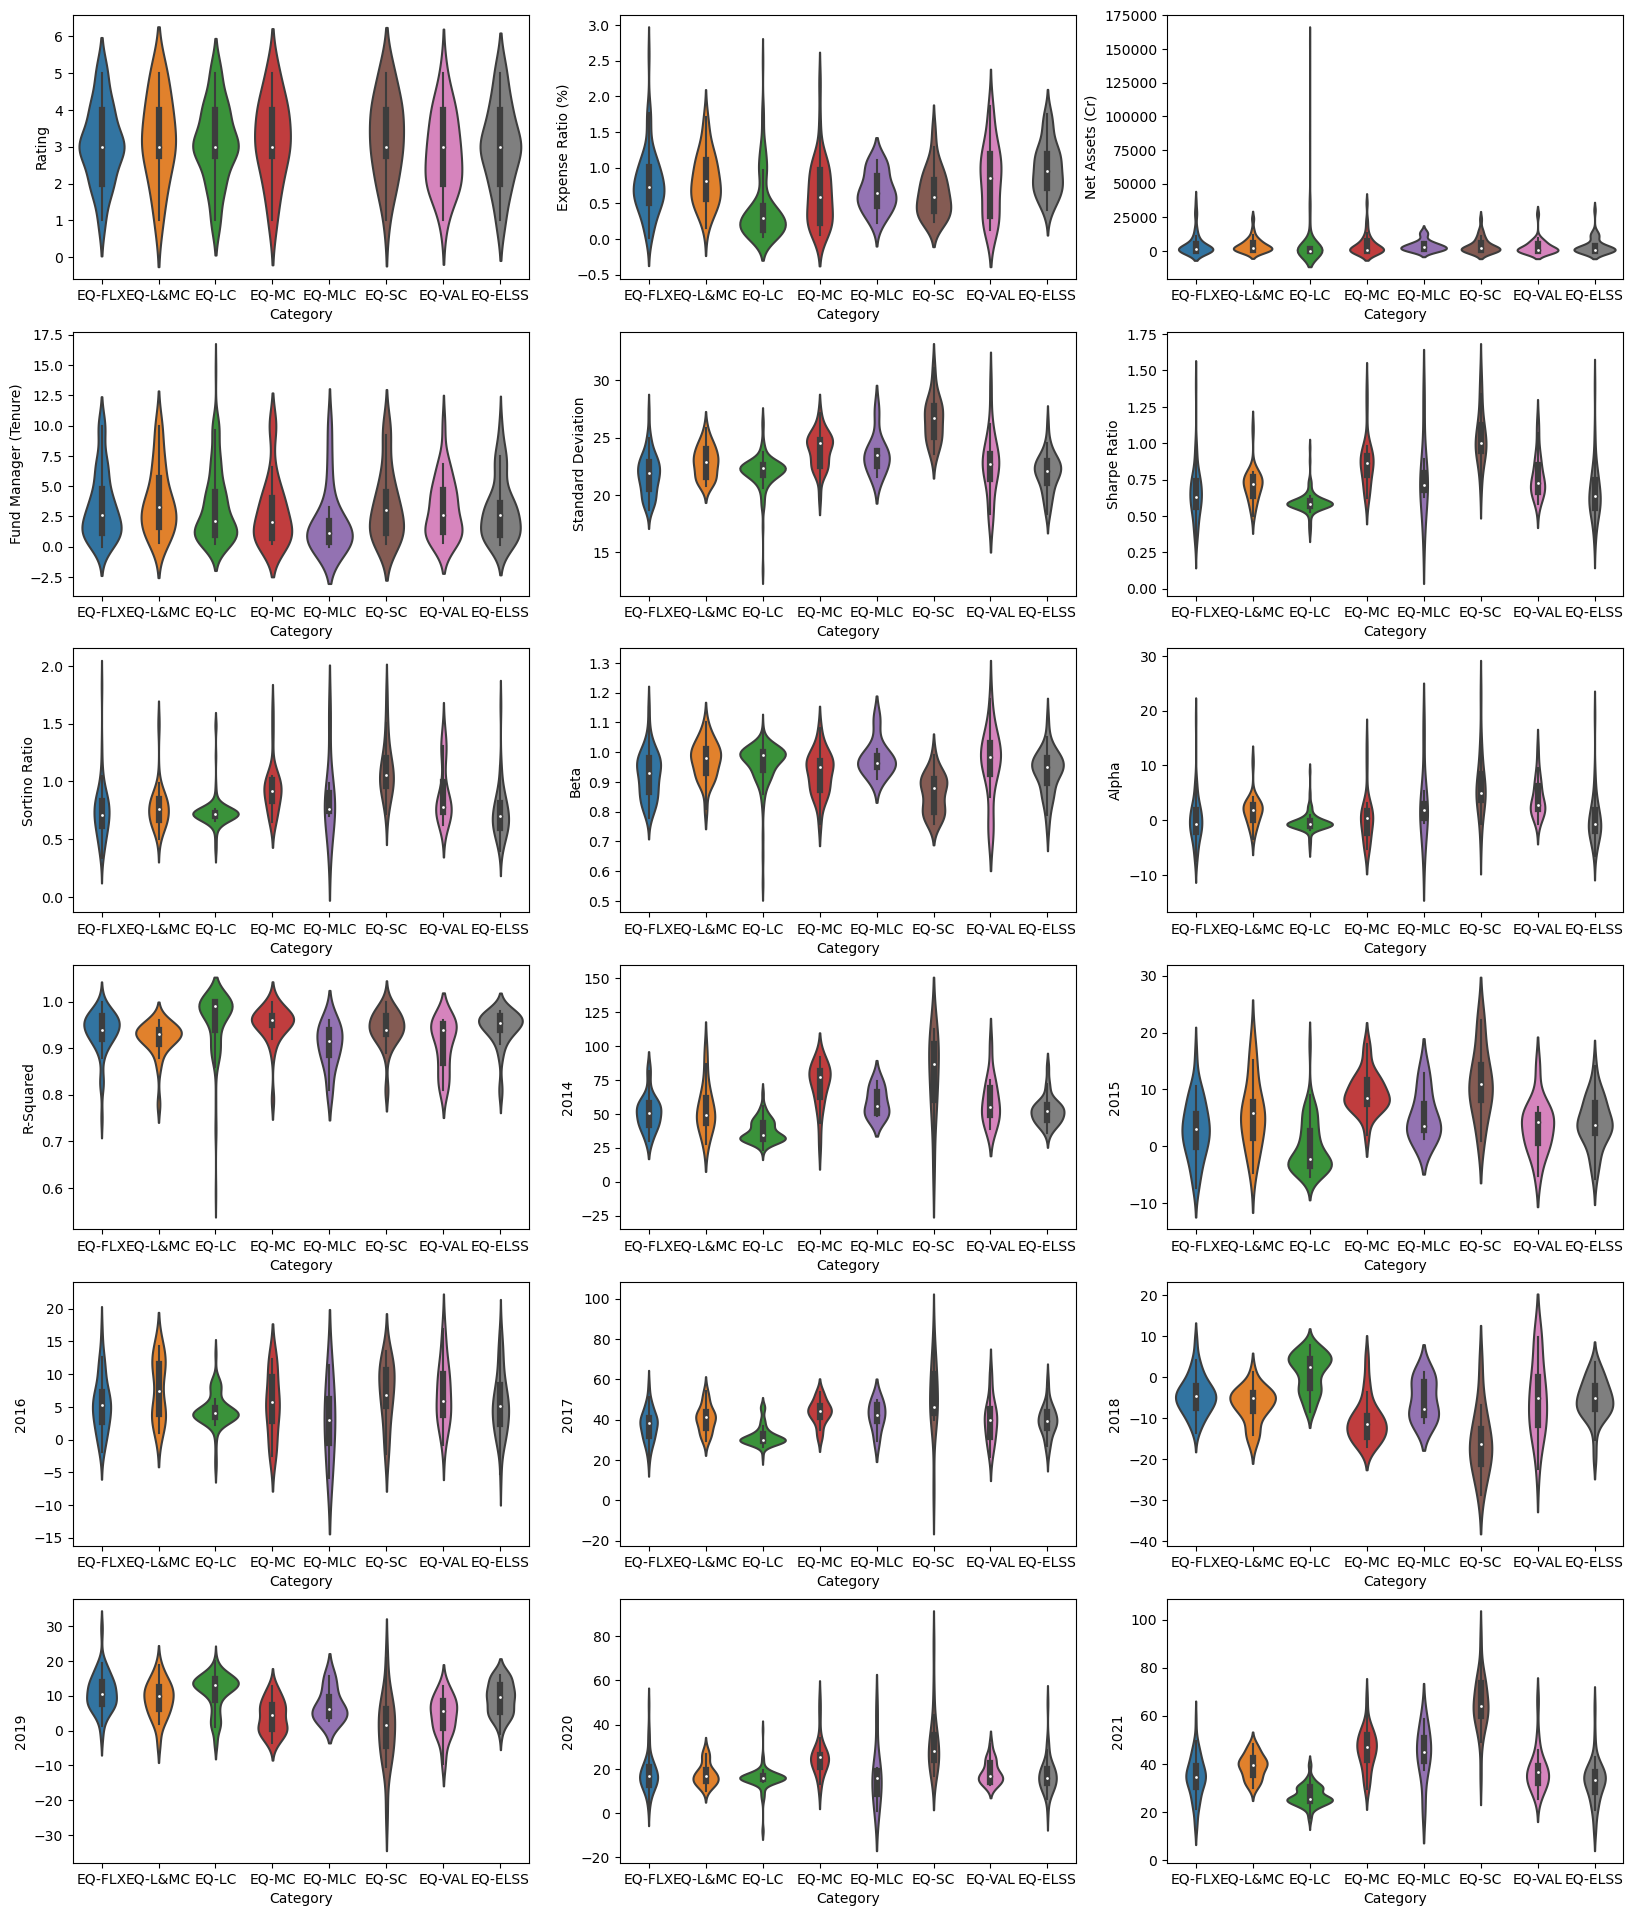

In [23]:
fig, axes = plt.subplots(6,3,figsize=(20,24))
for i, ax in enumerate(axes.ravel()):
    sns.violinplot(data=all_eq, x='Category', y=all_eq.loc[:, num_columns[i]], ax=ax)

<AxesSubplot:xlabel='Category', ylabel='2022'>

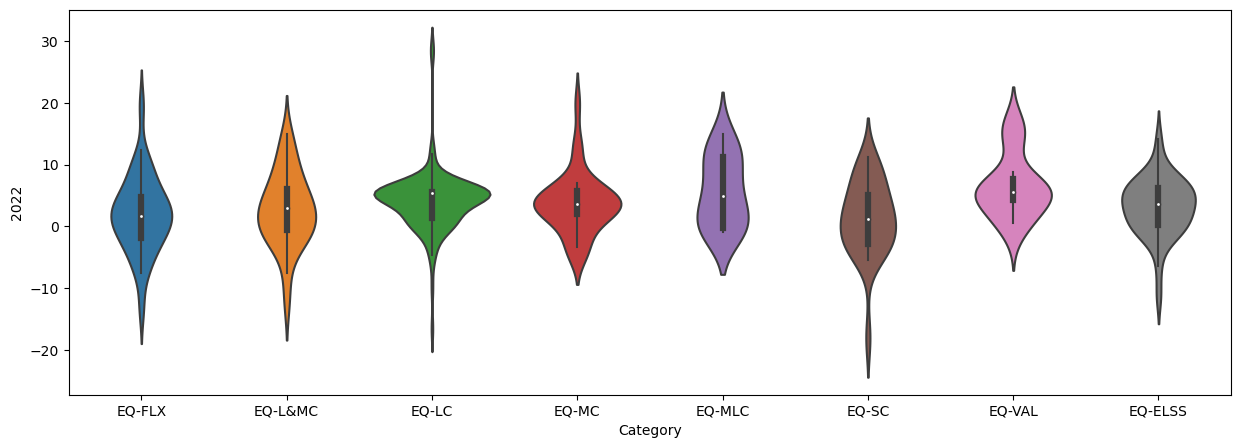

In [24]:
plt.figure(figsize=(15,5))
sns.violinplot(data=all_eq, x='Category', y=2022)

In [26]:
all_eq.groupby('Category').median().sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,
EQ-SC,3.0,0.59,2021.0,3.00,26.720,1.000,1.060,0.880,4.965,0.940,86.520,10.920,6.780,46.200,-16.295,1.620,28.025,64.18,1.180
EQ-FLX,3.0,0.73,1361.0,2.60,21.900,0.630,0.710,0.930,-0.750,0.940,50.705,2.970,5.230,38.580,-4.620,10.400,16.670,34.70,1.695
EQ-L&MC,3.0,0.81,2471.0,3.30,22.910,0.720,0.760,0.980,1.780,0.930,49.110,5.815,7.455,41.240,-5.140,9.860,16.570,39.46,2.970
EQ-ELSS,3.0,0.95,942.0,2.60,22.050,0.635,0.700,0.950,-0.690,0.955,52.050,3.780,5.060,39.125,-5.080,9.680,16.090,33.46,3.600
EQ-MC,3.0,0.59,892.0,2.00,24.525,0.865,0.915,0.950,0.345,0.960,77.205,8.510,5.730,44.480,-11.320,4.510,25.330,46.86,3.610
EQ-MLC,NaN,0.64,2960.0,1.15,23.495,0.715,0.760,0.965,1.770,0.915,55.825,3.620,2.980,42.435,-7.700,6.090,15.920,44.78,4.970
EQ-LC,3.0,0.30,241.5,2.10,22.310,0.580,0.720,0.990,-0.720,0.990,34.120,-2.255,4.030,30.020,2.500,13.130,15.710,25.49,5.360
EQ-VAL,3.0,0.86,615.0,2.60,22.740,0.725,0.780,0.985,2.740,0.940,55.405,4.290,5.970,39.675,-5.125,5.645,16.840,36.52,5.500


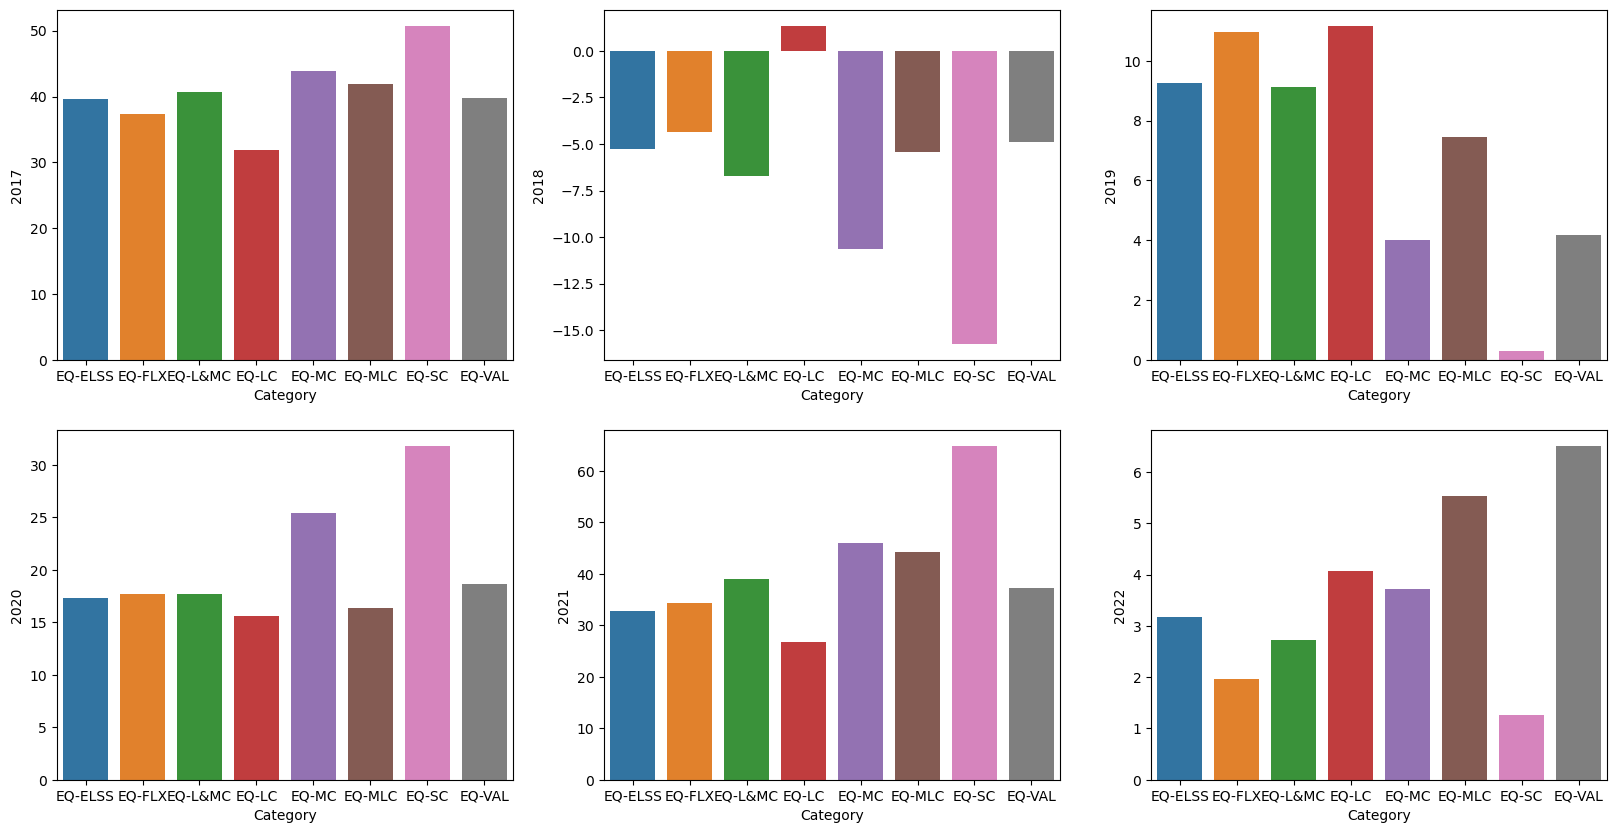

In [27]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=all_eq.groupby('Category').mean(), x=all_eq.groupby('Category').mean().index, y=all_eq.groupby('Category').mean().iloc[:, i+13], ax=ax)

In [28]:
df = all_eq.groupby('Category').mean().swapaxes("index", "columns").iloc[10:, :]
df

Category,EQ-ELSS,EQ-FLX,EQ-L&MC,EQ-LC,EQ-MC,EQ-MLC,EQ-SC,EQ-VAL
2014,52.380000,50.965000,53.911111,37.671967,71.993000,58.765000,78.493636,59.233571
2015,4.162759,3.010000,5.771667,-0.122742,9.492381,5.421667,11.256923,3.404286
2016,5.460000,5.402778,7.724500,4.470704,5.332857,2.840000,7.176154,7.162941
2017,39.589706,37.411351,40.615238,31.906533,43.861905,41.871667,50.658462,39.706111
2018,-5.282059,-4.375128,-6.727619,1.349759,-10.615000,-5.441429,-15.725000,-4.889444
2019,9.260571,10.976744,9.105909,11.149775,4.011304,7.440000,0.287059,4.161000
2020,17.352895,17.709804,17.680400,15.589802,25.393462,16.397500,31.765500,18.661000
2021,32.820789,34.311071,39.052963,26.839159,46.045357,44.203750,64.730417,37.298095
2022,3.172632,1.962188,2.726429,4.073496,3.715313,5.535385,1.260370,6.500000


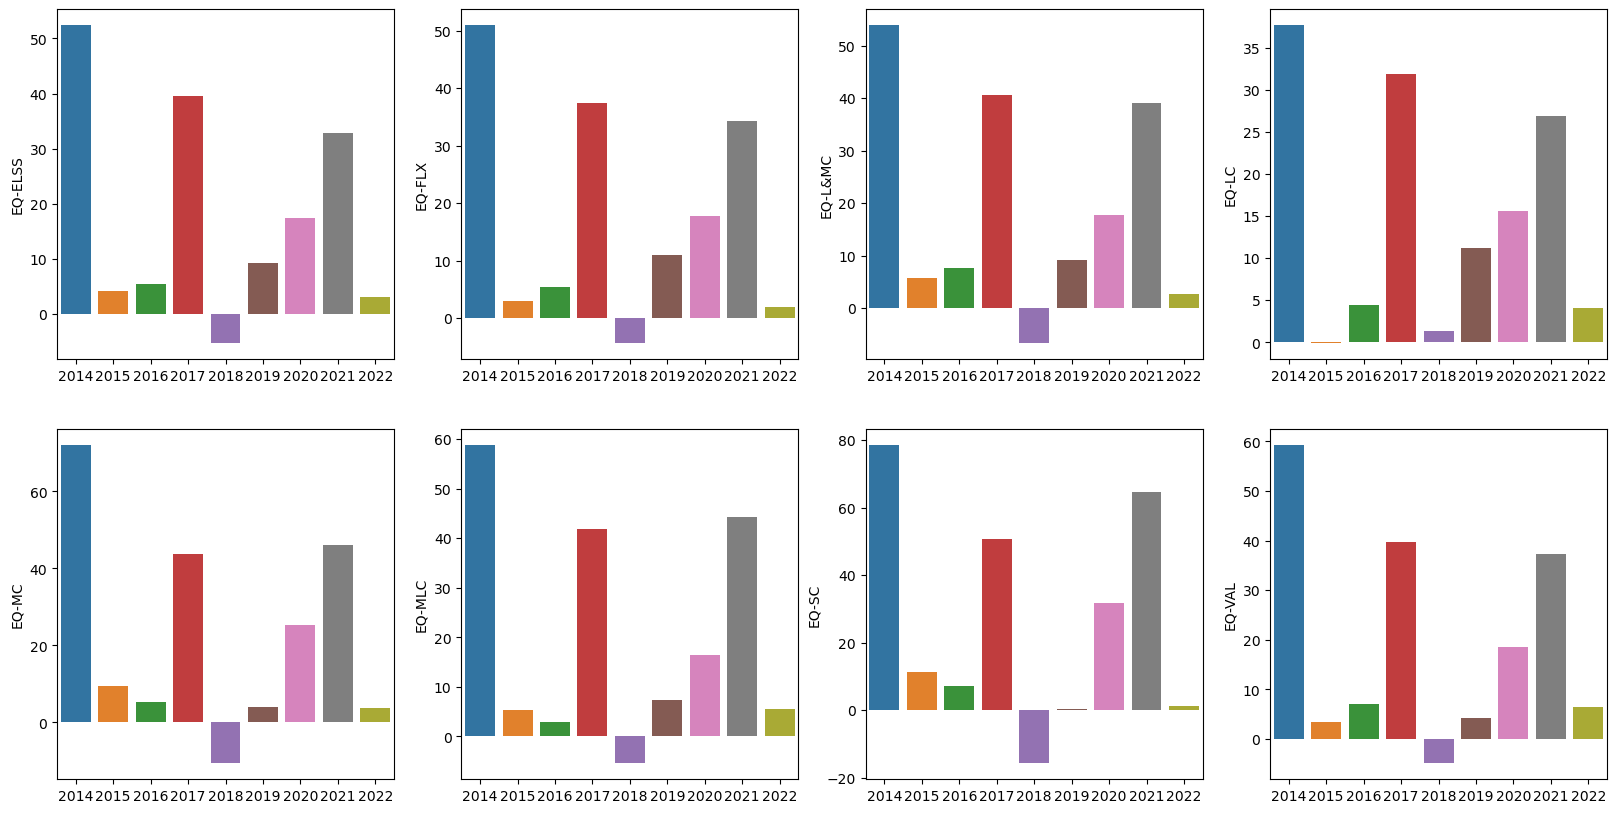

In [29]:
df = all_eq.groupby('Category').mean().swapaxes("index", "columns").iloc[10:, :]
fig, axes = plt.subplots(2,4,figsize=(20,10))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=df, x=df.index, y=df.iloc[:, i], ax=ax)

In [30]:
all_eq.groupby('Category').std().sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,
EQ-ELSS,1.109925,0.362907,6029.480603,2.551645,1.672802,0.193901,0.224632,0.073728,4.520056,0.039939,10.171621,4.409282,4.831545,7.811696,5.043802,4.699390,8.251281,9.148423,4.711978
EQ-LC,1.068818,0.434933,15888.291430,2.951810,1.489742,0.072110,0.136779,0.072559,1.691967,0.066373,8.253346,4.545554,2.569693,4.829239,4.694011,5.328775,4.932271,4.251073,4.881381
EQ-MC,1.141287,0.450924,7294.009984,2.855916,1.571474,0.168026,0.212364,0.071413,4.311478,0.041087,16.377123,3.533807,4.891714,6.089147,5.218580,4.702157,8.330649,8.345801,4.931645
EQ-VAL,1.053705,0.500305,5563.156392,2.455691,2.714662,0.146340,0.250328,0.116821,3.395496,0.053695,16.906330,4.602059,4.714115,10.637391,9.271450,5.726558,5.192231,8.813299,5.112513
EQ-MLC,NaN,0.275885,4062.313099,2.710938,1.725224,0.261643,0.333542,0.059761,6.467285,0.048697,10.713701,4.390059,6.112636,7.410672,5.022554,4.723981,13.444615,11.199941,5.676834
EQ-L&MC,1.188715,0.376936,5392.028525,2.803644,1.373630,0.115010,0.188682,0.064361,2.706579,0.037452,18.080536,6.168127,4.647949,6.664168,4.320879,5.242057,4.993659,5.035417,6.034057
EQ-SC,1.128576,0.332775,5660.010066,2.953751,1.934565,0.186996,0.243514,0.065089,5.692332,0.040946,30.729274,6.231537,4.749350,18.259664,8.147238,9.938157,13.895482,11.289446,6.170763
EQ-FLX,1.048471,0.451993,8139.489211,2.793952,1.785147,0.184592,0.241636,0.078699,4.262017,0.046744,12.704101,5.244069,4.203199,7.824543,4.716644,5.511268,8.130308,8.799019,6.241759


In [31]:
iqr = all_eq[num_columns + ['Category']].groupby('Category').quantile(.75) - \
      all_eq[num_columns + ['Category']].groupby('Category').quantile(.25)
iqr.sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Category,,,,,,,,,,,,,,,,,,,
EQ-VAL,2.00,0.8700,5079.00,3.50,2.2050,0.1850,0.2575,0.1025,4.2000,0.085,20.5150,4.8600,6.3200,14.0825,11.6050,7.705,8.7275,7.3300,3.4525
EQ-MC,1.25,0.7400,7116.50,3.25,2.2100,0.1350,0.1800,0.0975,4.0775,0.020,19.2425,4.2500,6.6900,5.4900,5.0525,6.675,5.2225,10.3400,3.8025
EQ-LC,1.25,0.3425,1110.75,3.50,0.8800,0.0300,0.0300,0.0600,0.8600,0.060,12.1000,6.2600,1.3700,3.3100,7.2200,6.120,1.7000,5.6050,4.1800
EQ-ELSS,2.00,0.4800,3834.00,2.60,1.9100,0.1950,0.2175,0.0850,3.9700,0.030,10.7700,5.3900,5.9400,8.2250,5.5100,7.750,6.3375,8.5525,6.0725
EQ-L&MC,1.25,0.5500,5474.00,4.10,2.4300,0.1300,0.1800,0.0800,2.7800,0.030,18.0575,6.4175,7.6275,7.6600,4.2300,6.165,5.1000,6.9650,6.6225
EQ-FLX,2.00,0.5000,5169.50,3.65,2.3450,0.1800,0.2200,0.1150,4.0400,0.050,16.2675,5.8300,4.5800,8.9900,5.1950,6.285,7.9950,8.5075,6.6700
EQ-SC,1.25,0.4300,5539.00,3.40,2.6475,0.1775,0.2425,0.1100,4.7675,0.040,40.9450,6.1300,5.4300,19.2700,8.5375,10.610,11.6300,13.6500,7.8150
EQ-MLC,NaN,0.4200,3825.75,1.75,1.2900,0.1175,0.1550,0.0375,2.5150,0.055,15.7250,4.5075,6.7800,8.0075,8.1250,5.325,10.3200,9.4700,11.5000


In [32]:
pd.melt(iqr.reset_index(), id_vars=['Category'], )

,Category,variable,value
0,EQ-ELSS,Rating,2.0000
1,EQ-FLX,Rating,2.0000
2,EQ-L&MC,Rating,1.2500
3,EQ-LC,Rating,1.2500
4,EQ-MC,Rating,1.2500
...,...,...,...
147,EQ-LC,2022,4.1800
148,EQ-MC,2022,3.8025
149,EQ-MLC,2022,11.5000
150,EQ-SC,2022,7.8150


# Analysis of One Category

In [33]:
all_eq['Category'].unique()

array(['EQ-FLX', 'EQ-L&MC', 'EQ-LC', 'EQ-MC', 'EQ-MLC', 'EQ-SC', 'EQ-VAL',
       'EQ-ELSS'], dtype=object)

In [34]:
one_eq = all_eq[all_eq['Category'] == 'EQ-FLX']

In [35]:
one_eq.iloc[:, 9:15]

,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared
Funds,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,19.27,0.43,0.52,0.82,-4.36,0.94
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,23.73,0.57,0.60,1.03,-2.19,0.97
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,19.38,0.44,0.53,0.82,-4.24,0.94
Axis Equity ETFs FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Axis Flexi Cap Fund - Direct Plan,19.40,0.55,0.71,0.80,-1.61,0.88
...,...,...,...,...,...,...
Union Focused Fund - Direct Plan,20.57,0.76,0.83,0.88,2.05,0.94
UTI Children's Career Fund-Investment Plan - Direct Plan,22.21,0.63,0.69,0.95,-0.79,0.96
UTI Flexi Cap Fund - Direct Plan,22.95,0.61,0.69,0.96,-0.92,0.92


<AxesSubplot:>

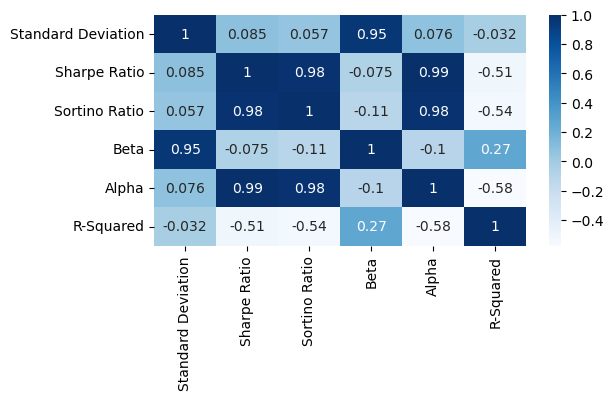

In [38]:
plt.figure(figsize=(6,3))
sns.heatmap(one_eq.iloc[:, 9:15].corr(), annot=True, cmap='Blues')

In [42]:
df = one_eq.iloc[:, -9:]
df

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.29,14.24,1.79
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,58.03,3.87,16.24,35.07,-3.01,9.53,17.11,31.38,-0.27
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.67,14.37,1.79
Axis Equity ETFs FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,8.79,19.04,21.08,29.93,-7.61
...,...,...,...,...,...,...,...,...,...
Union Focused Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,21.81,35.44,0.86
UTI Children's Career Fund-Investment Plan - Direct Plan,45.38,-1.23,6.49,39.83,-3.73,7.86,20.42,34.10,-2.94
UTI Flexi Cap Fund - Direct Plan,47.21,1.34,1.60,30.69,4.05,12.30,32.45,35.00,-12.68


In [43]:
df.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.29,14.24,1.79
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,58.03,3.87,16.24,35.07,-3.01,9.53,17.11,31.38,-0.27
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,16.67,14.37,1.79
Axis Equity ETFs FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,8.79,19.04,21.08,29.93,-7.61


In [44]:
df.shape

(71, 9)

In [45]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,30.000000,33.000000,36.000000,37.000000,39.000000,43.000000,51.000000,56.000000,64.000000
mean,50.965000,3.010000,5.402778,37.411351,-4.375128,10.976744,17.709804,34.311071,1.962187
std,12.704101,5.244069,4.203199,7.824543,4.716644,5.511268,8.130308,8.799019,6.241759
min,29.760000,-7.280000,-1.970000,19.570000,-13.670000,-1.870000,1.720000,14.240000,-13.560000
25%,41.515000,-0.130000,2.680000,32.070000,-7.380000,7.570000,12.880000,30.455000,-1.832500
50%,50.705000,2.970000,5.230000,38.580000,-4.620000,10.400000,16.670000,34.700000,1.695000
75%,57.782500,5.700000,7.260000,41.060000,-2.185000,13.855000,20.875000,38.962500,4.837500
max,83.020000,15.740000,16.240000,56.850000,8.790000,29.230000,49.110000,58.270000,19.930000


number of mutual funds in each year

In [46]:
df.count()

2014    30
2015    33
2016    36
2017    37
2018    39
2019    43
2020    51
2021    56
2022    64
dtype: int64

number of years each mutual fund is operating

In [47]:
df.count(axis=1)

Funds
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan               3
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan                    9
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan    3
Axis Equity ETFs FoF - Direct Plan                                    0
Axis Flexi Cap Fund - Direct Plan                                     5
                                                                     ..
Union Focused Fund - Direct Plan                                      3
UTI Children's Career Fund-Investment Plan - Direct Plan              9
UTI Flexi Cap Fund - Direct Plan                                      9
UTI Focused Equity Fund - Direct Plan                                 1
WhiteOak Capital Flexi Cap Fund - Direct Plan                         0
Length: 71, dtype: int64

average return of all funds by year

In [48]:
df.mean()

2014    50.965000
2015     3.010000
2016     5.402778
2017    37.411351
2018    -4.375128
2019    10.976744
2020    17.709804
2021    34.311071
2022     1.962187
dtype: float64

percentage of funds having positive return by year

In [49]:
(df>0).sum() / df.count() * 100

2014    100.000000
2015     72.727273
2016     91.666667
2017    100.000000
2018     17.948718
2019     97.674419
2020    100.000000
2021    100.000000
2022     65.625000
dtype: float64

Select funds with minimum years of history and from recent years

In [50]:
dfd = df.iloc[:, :].dropna(thresh=3)
dfd.shape

(51, 9)

In [51]:
dfd.count(axis=1)

Funds
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan                3
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan                     9
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan     3
Axis Flexi Cap Fund - Direct Plan                                      5
Axis Focused 25 Fund - Direct Plan                                     9
Baroda BNP Paribas Focused Fund - Direct Plan                          5
Canara Robeco Flexi Cap Fund - Direct Plan                             9
DSP Flexi Cap Fund - Direct Plan                                       9
DSP Focus Fund - Direct Plan                                           9
Edelweiss Flexi Cap Fund - Direct Plan                                 7
Franklin India Flexi Cap Fund - Direct Plan                            9
Franklin India Focused Equity Fund - Direct Plan                       9
HDFC Flexi Cap Fund - Direct Plan                                      9
HDFC Focused 30 Fund - Direct Plan           

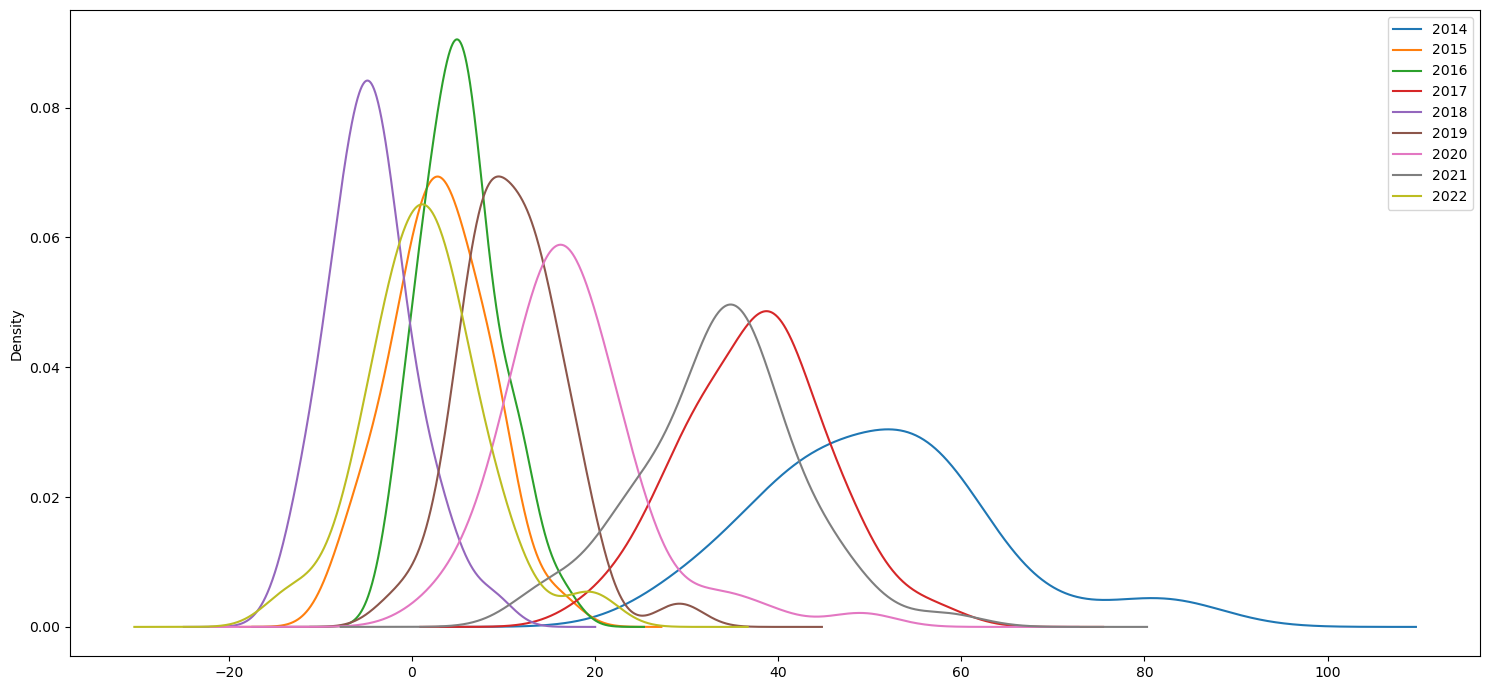

In [52]:
dfd.plot.kde(figsize=(15,7))
plt.tight_layout()
plt.show()

# CAGR

Cumulative Annual Growth Rate

In [53]:
def total_return(x):
    s = 1
    for i in x:
        if not np.isnan(i):
            s *= (1 + i/100)
    return s

In [54]:
cagr = (dfd.apply(lambda row : total_return(row), axis=1)**(1/dfd.count(axis=1)) - 1).sort_values(ascending=False)
cagr.name = 'cagr'

In [55]:
cagr.sort_values(ascending=False)

Funds
Quant Flexi Cap Fund - Direct Plan                                     0.230199
ICICI Prudential Retirement Fund - Pure Equity Plan - Direct Plan      0.204217
Nippon India Focused Equity Fund - Direct Plan                         0.194456
Franklin India Focused Equity Fund - Direct Plan                       0.193514
Union Focused Fund - Direct Plan                                       0.184994
Parag Parikh Flexi Cap Fund - Direct Plan                              0.184064
JM Flexicap Fund - Direct Plan                                         0.182373
Tata Focused Equity Fund - Direct Plan                                 0.180910
Mirae Asset Focused Fund - Direct Plan                                 0.180718
HDFC Retirement Savings Fund Equity Plan - Direct Plan                 0.180534
SBI Focused Equity Fund - Direct Plan                                  0.180289
Kotak Flexicap Fund - Direct Plan                                      0.175283
Kotak Focused Equity Fund - Direct

# Ergodic Sum

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
values = dfd.to_numpy()

In [58]:
scaled = StandardScaler(with_mean=False, with_std=True).fit_transform(values)

In [59]:
scaled = np.round(scaled, 3)

In [60]:
scaled_dfd = pd.DataFrame(scaled, index=dfd.index, columns=dfd.columns)

In [61]:
scaled_dfd

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,2.024,1.653,0.278
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,4.646,0.749,3.919,4.544,-0.647,1.750,2.125,3.643,-0.042
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,2.071,1.668,0.278
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,1.888,3.496,2.619,3.475,-1.183
Axis Focused 25 Fund - Direct Plan,3.232,1.042,1.404,6.071,0.393,2.974,2.792,2.943,-2.109
Baroda BNP Paribas Focused Fund - Direct Plan,NaN,NaN,NaN,NaN,-2.303,2.602,2.147,2.756,0.644
Canara Robeco Flexi Cap Fund - Direct Plan,3.231,0.128,-0.333,5.014,0.331,2.460,2.964,3.994,-0.051
DSP Flexi Cap Fund - Direct Plan,4.312,-0.025,1.153,5.320,-1.452,3.307,2.482,3.932,-0.538
DSP Focus Fund - Direct Plan,4.063,0.523,1.667,3.918,-1.035,3.543,1.261,2.736,-0.533


In [62]:
(scaled_dfd>0).sum()/scaled_dfd.count()

2014    1.000000
2015    0.727273
2016    0.916667
2017    1.000000
2018    0.179487
2019    0.976744
2020    1.000000
2021    1.000000
2022    0.607843
dtype: float64

In [63]:
ergodic = (scaled_dfd[scaled_dfd>0].sum(axis=1).add(2*scaled_dfd[scaled_dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False)
ergodic.name = 'ergodic'
ergodic

Funds
Quant Flexi Cap Fund - Direct Plan                                     2.666333
ICICI Prudential Retirement Fund - Pure Equity Plan - Direct Plan      2.629000
Union Focused Fund - Direct Plan                                       2.319000
Kotak Flexicap Fund - Direct Plan                                      2.315444
Parag Parikh Flexi Cap Fund - Direct Plan                              2.314556
Tata Focused Equity Fund - Direct Plan                                 2.295667
JM Flexicap Fund - Direct Plan                                         2.279667
HDFC Retirement Savings Fund Equity Plan - Direct Plan                 2.267167
Franklin India Focused Equity Fund - Direct Plan                       2.247444
IIFL Focused Equity Fund - Direct Plan                                 2.243375
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan                     2.222000
Kotak Focused Equity Fund - Direct Plan                                2.194000
Navi Flexi Cap Fund - Direct Plan 

without standardizing

In [64]:
(dfd[dfd>0].sum(axis=1).add(2*dfd[dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False).head(10)

Funds
Quant Flexi Cap Fund - Direct Plan                                   24.791111
ICICI Prudential Retirement Fund - Pure Equity Plan - Direct Plan    21.936667
Franklin India Focused Equity Fund - Direct Plan                     20.911111
Nippon India Focused Equity Fund - Direct Plan                       20.780000
Union Focused Fund - Direct Plan                                     19.370000
Parag Parikh Flexi Cap Fund - Direct Plan                            19.156667
JM Flexicap Fund - Direct Plan                                       19.054444
SBI Focused Equity Fund - Direct Plan                                18.925556
Kotak Flexicap Fund - Direct Plan                                    18.734444
Tata Focused Equity Fund - Direct Plan                               18.700000
dtype: float64

# Average Ranking

Ranking of each fund in each year - bigger number is better

In [65]:
dfdr = dfd.rank(axis=0, ascending = True)
dfdr

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,22.0,1.0,28.5
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,24.0,19.0,36.0,14.0,26.0,20.0,29.0,19.0,20.0
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,26.0,2.0,28.5
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,39.0,41.0,39.0,14.0,3.0
Axis Focused 25 Fund - Direct Plan,6.0,23.0,20.0,34.0,36.0,37.0,43.0,10.0,1.0
Baroda BNP Paribas Focused Fund - Direct Plan,NaN,NaN,NaN,NaN,4.0,33.0,31.0,8.0,36.0
Canara Robeco Flexi Cap Fund - Direct Plan,5.0,11.0,2.0,20.0,35.0,31.0,45.0,27.0,19.0
DSP Flexi Cap Fund - Direct Plan,18.0,9.0,18.0,28.0,14.0,40.0,36.0,23.0,10.0
DSP Focus Fund - Direct Plan,16.0,16.0,26.0,7.0,19.0,42.0,5.0,7.0,11.0


Percentile ranking of funds

In [66]:
dfdr = dfdr/dfdr.count()*100
dfdr

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,43.137255,1.960784,55.882353
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,80.000000,57.575758,100.000000,37.837838,66.666667,46.511628,56.862745,37.254902,39.215686
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,50.980392,3.921569,55.882353
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,100.000000,95.348837,76.470588,27.450980,5.882353
Axis Focused 25 Fund - Direct Plan,20.000000,69.696970,55.555556,91.891892,92.307692,86.046512,84.313725,19.607843,1.960784
Baroda BNP Paribas Focused Fund - Direct Plan,NaN,NaN,NaN,NaN,10.256410,76.744186,60.784314,15.686275,70.588235
Canara Robeco Flexi Cap Fund - Direct Plan,16.666667,33.333333,5.555556,54.054054,89.743590,72.093023,88.235294,52.941176,37.254902
DSP Flexi Cap Fund - Direct Plan,60.000000,27.272727,50.000000,75.675676,35.897436,93.023256,70.588235,45.098039,19.607843
DSP Focus Fund - Direct Plan,53.333333,48.484848,72.222222,18.918919,48.717949,97.674419,9.803922,13.725490,21.568627


## Funds in top percentile

In [67]:
top_percentile = (dfdr[dfdr>=50].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)

In [68]:
top_percentile.name = 'top_percentile'

In [69]:
top_percentile.head(10)

Funds
HDFC Retirement Savings Fund Equity Plan - Direct Plan    0.833333
Franklin India Flexi Cap Fund - Direct Plan               0.777778
Franklin India Focused Equity Fund - Direct Plan          0.777778
Navi Flexi Cap Fund - Direct Plan                         0.750000
Kotak Flexicap Fund - Direct Plan                         0.666667
SBI Focused Equity Fund - Direct Plan                     0.666667
Nippon India Focused Equity Fund - Direct Plan            0.666667
Motilal Oswal Nifty 500 Index Fund - Direct Plan          0.666667
Mirae Asset Focused Fund - Direct Plan                    0.666667
Tata Focused Equity Fund - Direct Plan                    0.666667
Name: top_percentile, dtype: float64

## Average percentile rank

In [70]:
dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)/100

In [71]:
dfdr.sort_values(by='rank', ascending=False)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,rank
Funds,,,,,,,,,,
Quant Flexi Cap Fund - Direct Plan,93.333333,45.454545,80.555556,89.189189,15.384615,2.325581,100.000000,100.000000,96.078431,0.691468
HDFC Retirement Savings Fund Equity Plan - Direct Plan,NaN,NaN,NaN,67.567568,53.846154,18.604651,68.627451,90.196078,94.117647,0.654933
IIFL Focused Equity Fund - Direct Plan,NaN,54.545455,86.111111,24.324324,43.589744,100.000000,90.196078,76.470588,43.137255,0.647968
Union Focused Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,78.431373,62.745098,49.019608,0.633987
ICICI Prudential Retirement Fund - Pure Equity Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,25.490196,98.039216,66.666667,0.633987
JM Flexicap Fund - Direct Plan,73.333333,22.727273,97.222222,72.972973,51.282051,90.697674,23.529412,47.058824,90.196078,0.632244
SBI Focused Equity Fund - Direct Plan,85.000000,66.666667,30.555556,86.486486,69.230769,88.372093,39.215686,92.156863,7.843137,0.628364
Kotak Flexicap Fund - Direct Plan,85.000000,60.606061,88.888889,40.540541,85.897436,69.767442,27.450980,23.529412,80.392157,0.624525
Nippon India Focused Equity Fund - Direct Plan,100.000000,87.878788,41.666667,81.081081,5.128205,27.906977,54.901961,72.549020,88.235294,0.621498


# More than mean returns

In [72]:
dfd.mean()

2014    50.965000
2015     3.010000
2016     5.402778
2017    37.411351
2018    -4.375128
2019    10.976744
2020    17.709804
2021    33.557059
2022     1.522941
dtype: float64

Excess return of fund (fund return - mean return in year)

In [73]:
dfdm = dfd-dfd.mean()
dfdm

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,-1.419804,-19.317059,0.267059
Aditya Birla Sun Life Flexi Cap Fund - Direct Plan,7.065,0.86,10.837222,-2.341351,1.365128,-1.446744,-0.599804,-2.177059,-1.792941
Aditya Birla Sun Life Retirement Fund - The 30s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,-1.039804,-19.187059,0.267059
Axis Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,13.165128,8.063256,3.370196,-3.627059,-9.132941
Axis Focused 25 Fund - Direct Plan,-10.595,2.37,0.417222,9.448649,6.205128,5.223256,4.770196,-8.207059,-15.082941
Baroda BNP Paribas Focused Fund - Direct Plan,NaN,NaN,NaN,NaN,-6.344872,3.193256,-0.429804,-9.817059,2.617059
Canara Robeco Flexi Cap Fund - Direct Plan,-10.605,-2.35,-6.782778,1.288649,5.915128,2.423256,6.150196,0.842941,-1.852941
DSP Flexi Cap Fund - Direct Plan,2.895,-3.14,-0.622778,3.648649,-2.384872,7.033256,2.270196,0.312941,-4.982941
DSP Focus Fund - Direct Plan,-0.215,-0.31,1.507222,-7.171351,-0.444872,8.323256,-7.559804,-9.987059,-4.952941


## alpha

In [74]:
alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
alpha.name = 'alpha'
alpha

Funds
Quant Flexi Cap Fund - Direct Plan                                     8.696606
Nippon India Focused Equity Fund - Direct Plan                         4.745495
Franklin India Focused Equity Fund - Direct Plan                       4.413272
ICICI Prudential Retirement Fund - Pure Equity Plan - Direct Plan      4.340065
IIFL Focused Equity Fund - Direct Plan                                 3.464306
PGIM India Flexi Cap Fund - Direct Plan                                3.242064
HDFC Retirement Savings Fund Equity Plan - Direct Plan                 3.206205
SBI Focused Equity Fund - Direct Plan                                  2.719939
Parag Parikh Flexi Cap Fund - Direct Plan                              2.502161
Axis Flexi Cap Fund - Direct Plan                                      2.367716
JM Flexicap Fund - Direct Plan                                         2.351050
Mirae Asset Focused Fund - Direct Plan                                 2.120065
Union Focused Fund - Direct Plan  

## Funds consistently given positive excess returns

In [75]:
dfdm['consistency'] = dfdm[dfdm > 0].count(axis=1)*100/dfdm.count(axis=1)/100

In [76]:
dfdm.sort_values(by='consistency', ascending=False).head(10)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,consistency
Funds,,,,,,,,,,
Navi Flexi Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,4.563256,-6.749804,1.862941,0.947059,0.750000
Kotak Flexicap Fund - Direct Plan,8.105,0.94,5.347222,-1.551351,4.535128,2.383256,-4.819804,-6.967059,4.457059,0.666667
SBI Focused Equity Fund - Direct Plan,8.105,2.34,-2.272778,8.568649,1.605128,6.203256,-1.959804,10.972941,-9.082941,0.666667
ICICI Prudential Retirement Fund - Pure Equity Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,-4.839804,15.782941,2.077059,0.666667
Tata Focused Equity Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,-3.599804,1.852941,5.057059,0.666667
JM Flexicap Fund - Direct Plan,6.105,-4.24,7.287222,3.558649,-0.244872,6.563256,-5.459804,0.422941,7.167059,0.666667
HDFC Retirement Savings Fund Equity Plan - Direct Plan,NaN,NaN,NaN,2.528649,-0.114872,-4.366744,2.050196,10.712941,8.427059,0.666667
Quant Flexi Cap Fund - Direct Plan,18.075,-0.95,2.787222,9.328649,-5.084872,-12.846744,31.400196,24.712941,10.847059,0.666667
HDFC Flexi Cap Fund - Direct Plan,3.895,-7.31,2.757222,0.638649,1.765128,-3.546744,-10.659804,3.442941,17.567059,0.666667


# All Metrics

In [77]:
all_metrics = (dfdm['consistency'].to_frame().join(top_percentile).join(dfdr['rank']).join(cagr).join(ergodic).join(alpha)).sort_values(by=['ergodic'], ascending=False)

In [78]:
all_metrics.columns.append(one_eq.columns[9:12])

Index(['consistency', 'top_percentile', 'rank', 'cagr', 'ergodic', 'alpha',
       'Standard Deviation', 'Sharpe Ratio', 'Sortino Ratio'],
      dtype='object')

In [79]:
all_metrics.join(one_eq).loc[:, all_metrics.columns.append(one_eq.columns[9:12])]

,consistency,top_percentile,rank,cagr,ergodic,alpha,Standard Deviation,Sharpe Ratio,Sortino Ratio
Funds,,,,,,,,,
Quant Flexi Cap Fund - Direct Plan,0.666667,0.666667,0.691468,0.230199,2.666333,8.696606,22.74,1.40,1.83
ICICI Prudential Retirement Fund - Pure Equity Plan - Direct Plan,0.666667,0.666667,0.633987,0.204217,2.629000,4.340065,21.74,0.80,0.86
Union Focused Fund - Direct Plan,0.666667,0.666667,0.633987,0.184994,2.319000,1.773399,20.57,0.76,0.83
Kotak Flexicap Fund - Direct Plan,0.666667,0.666667,0.624525,0.175283,2.315444,1.381050,21.65,0.59,0.62
Parag Parikh Flexi Cap Fund - Direct Plan,0.555556,0.555556,0.616964,0.184064,2.314556,2.502161,19.70,0.95,1.04
Tata Focused Equity Fund - Direct Plan,0.666667,0.666667,0.581699,0.180910,2.295667,1.103399,22.73,0.69,0.79
JM Flexicap Fund - Direct Plan,0.666667,0.666667,0.632244,0.182373,2.279667,2.351050,21.96,0.70,0.81
HDFC Retirement Savings Fund Equity Plan - Direct Plan,0.666667,0.833333,0.654933,0.180534,2.267167,3.206205,21.72,0.94,1.02
Franklin India Focused Equity Fund - Direct Plan,0.666667,0.777778,0.607068,0.193514,2.247444,4.413272,24.97,0.71,0.83


In [80]:
all_eq.loc[all_metrics.index]

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022
Funds,,,,,,,,,,,,,,,,,,,,,
Quant Flexi Cap Fund - Direct Plan,NaN,EQ-FLX,0.58,2013-01-01 00:00:00,920.0,3.3,--,--,Very High,22.74,...,0.75,69.04,2.06,8.19,46.74,-9.46,-1.87,49.11,58.27,12.37
ICICI Prudential Retirement Fund - Pure Equity Plan - Direct Plan,5.0,EQ-FLX,1.22,2019-02-27 00:00:00,210.0,3.9,Below Average,Above Average,Very High,21.74,...,0.83,NaN,NaN,NaN,NaN,NaN,NaN,12.87,49.34,3.60
Union Focused Fund - Direct Plan,4.0,EQ-FLX,1.57,2019-08-05 00:00:00,330.0,3.5,Low,Above Average,Very High,20.57,...,0.94,NaN,NaN,NaN,NaN,NaN,NaN,21.81,35.44,0.86
Kotak Flexicap Fund - Direct Plan,3.0,EQ-FLX,0.67,2013-01-01 00:00:00,37418.0,10.0,Below Average,Average,Very High,21.65,...,0.98,59.07,3.95,10.75,35.86,0.16,13.36,12.89,26.59,5.98
Parag Parikh Flexi Cap Fund - Direct Plan,5.0,EQ-FLX,0.76,2013-05-28 00:00:00,28248.0,9.7,Low,High,Very High,19.70,...,0.82,45.50,9.51,3.86,30.10,0.16,15.34,33.55,46.97,-6.29
Tata Focused Equity Fund - Direct Plan,3.0,EQ-FLX,0.43,2019-12-05 00:00:00,1290.0,0.8,Above Average,Above Average,Very High,22.73,...,0.97,NaN,NaN,NaN,NaN,NaN,NaN,14.11,35.41,6.58
JM Flexicap Fund - Direct Plan,3.0,EQ-FLX,1.76,2013-01-01 00:00:00,250.0,1.4,Below Average,Average,Very High,21.96,...,0.92,57.07,-1.23,12.69,40.97,-4.62,17.54,12.25,33.98,8.69
HDFC Retirement Savings Fund Equity Plan - Direct Plan,5.0,EQ-FLX,0.83,2016-02-25 00:00:00,2641.0,7.0,Below Average,High,Very High,21.72,...,0.94,NaN,NaN,NaN,39.94,-4.49,6.61,19.76,44.27,9.95
Franklin India Focused Equity Fund - Direct Plan,3.0,EQ-FLX,1.04,2013-01-01 00:00:00,8414.0,6.7,Above Average,Above Average,Very High,24.97,...,0.89,81.33,2.97,6.27,39.00,-7.70,11.97,11.79,40.53,9.74


In [81]:
high = [2007,2009,2010,2012,2014,2017,2020,2021]
low = [2008,2011,2013,2015,2016,2018,2019,2022]
s1 = dfdm.loc[:, high[-3:]].mean(axis=1).rename('high')
s2 = dfdm.loc[:, low[-3:]].mean(axis=1).rename('low')
hl = pd.concat([s1, s2], axis=1)
hl['diff'] = hl['high'] - hl['low']
hl.sort_values('low', ascending=False)

,high,low,diff
Funds,,,
IIFL Focused Equity Fund - Direct Plan,2.157262,5.301814,-3.144552
HDFC Flexi Cap Fund - Direct Plan,-2.192738,5.261814,-7.454552
Tata Focused Equity Fund - Direct Plan,-0.873431,5.057059,-5.930490
JM Flexicap Fund - Direct Plan,-0.492738,4.495148,-4.987886
Axis Flexi Cap Fund - Direct Plan,-0.128431,4.031814,-4.160246
Kotak Flexicap Fund - Direct Plan,-4.446071,3.791814,-8.237886
Navi Flexi Cap Fund - Direct Plan,-2.443431,2.755157,-5.198589
ICICI Prudential Passive Strategy Fund (FOF) - Direct Plan,-9.102738,2.621814,-11.724552
Motilal Oswal Nifty 500 Index Fund - Direct Plan,-1.698431,2.267059,-3.965490


<AxesSubplot:>

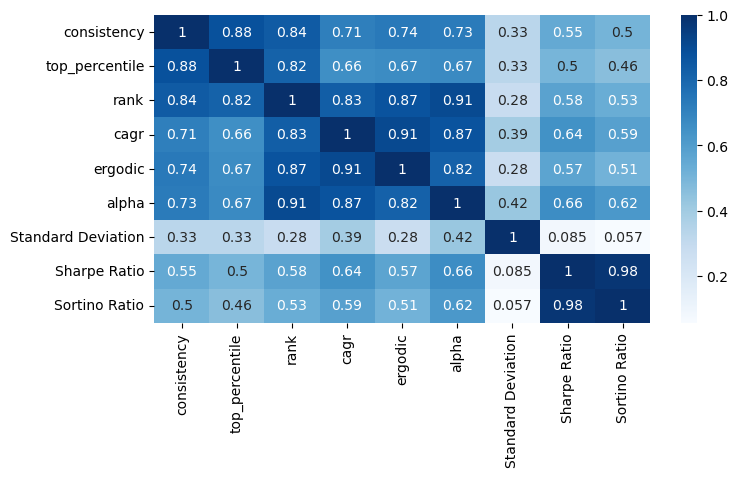

In [83]:
plt.figure(figsize=(8,4))
sns.heatmap(all_metrics.join(one_eq).loc[:, all_metrics.columns.append(one_eq.columns[9:12])].corr(), annot=True, cmap='Blues')

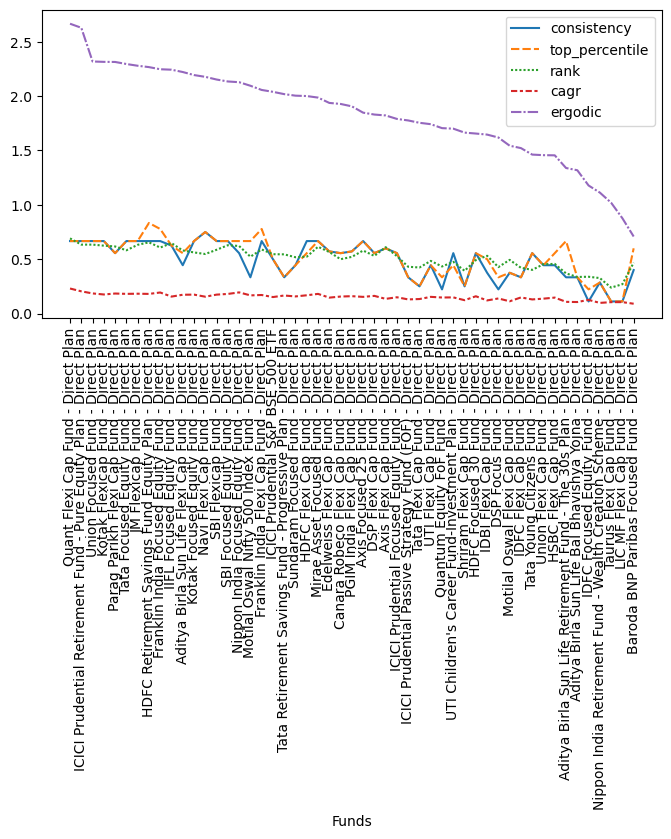

In [85]:
plt.figure(figsize=(8,4))
sns.lineplot(data=all_metrics.iloc[:, :5], sort=False)
# plt.xticks(np.arange(len(all_metrics)), [])
plt.xticks(rotation=90)
plt.show()

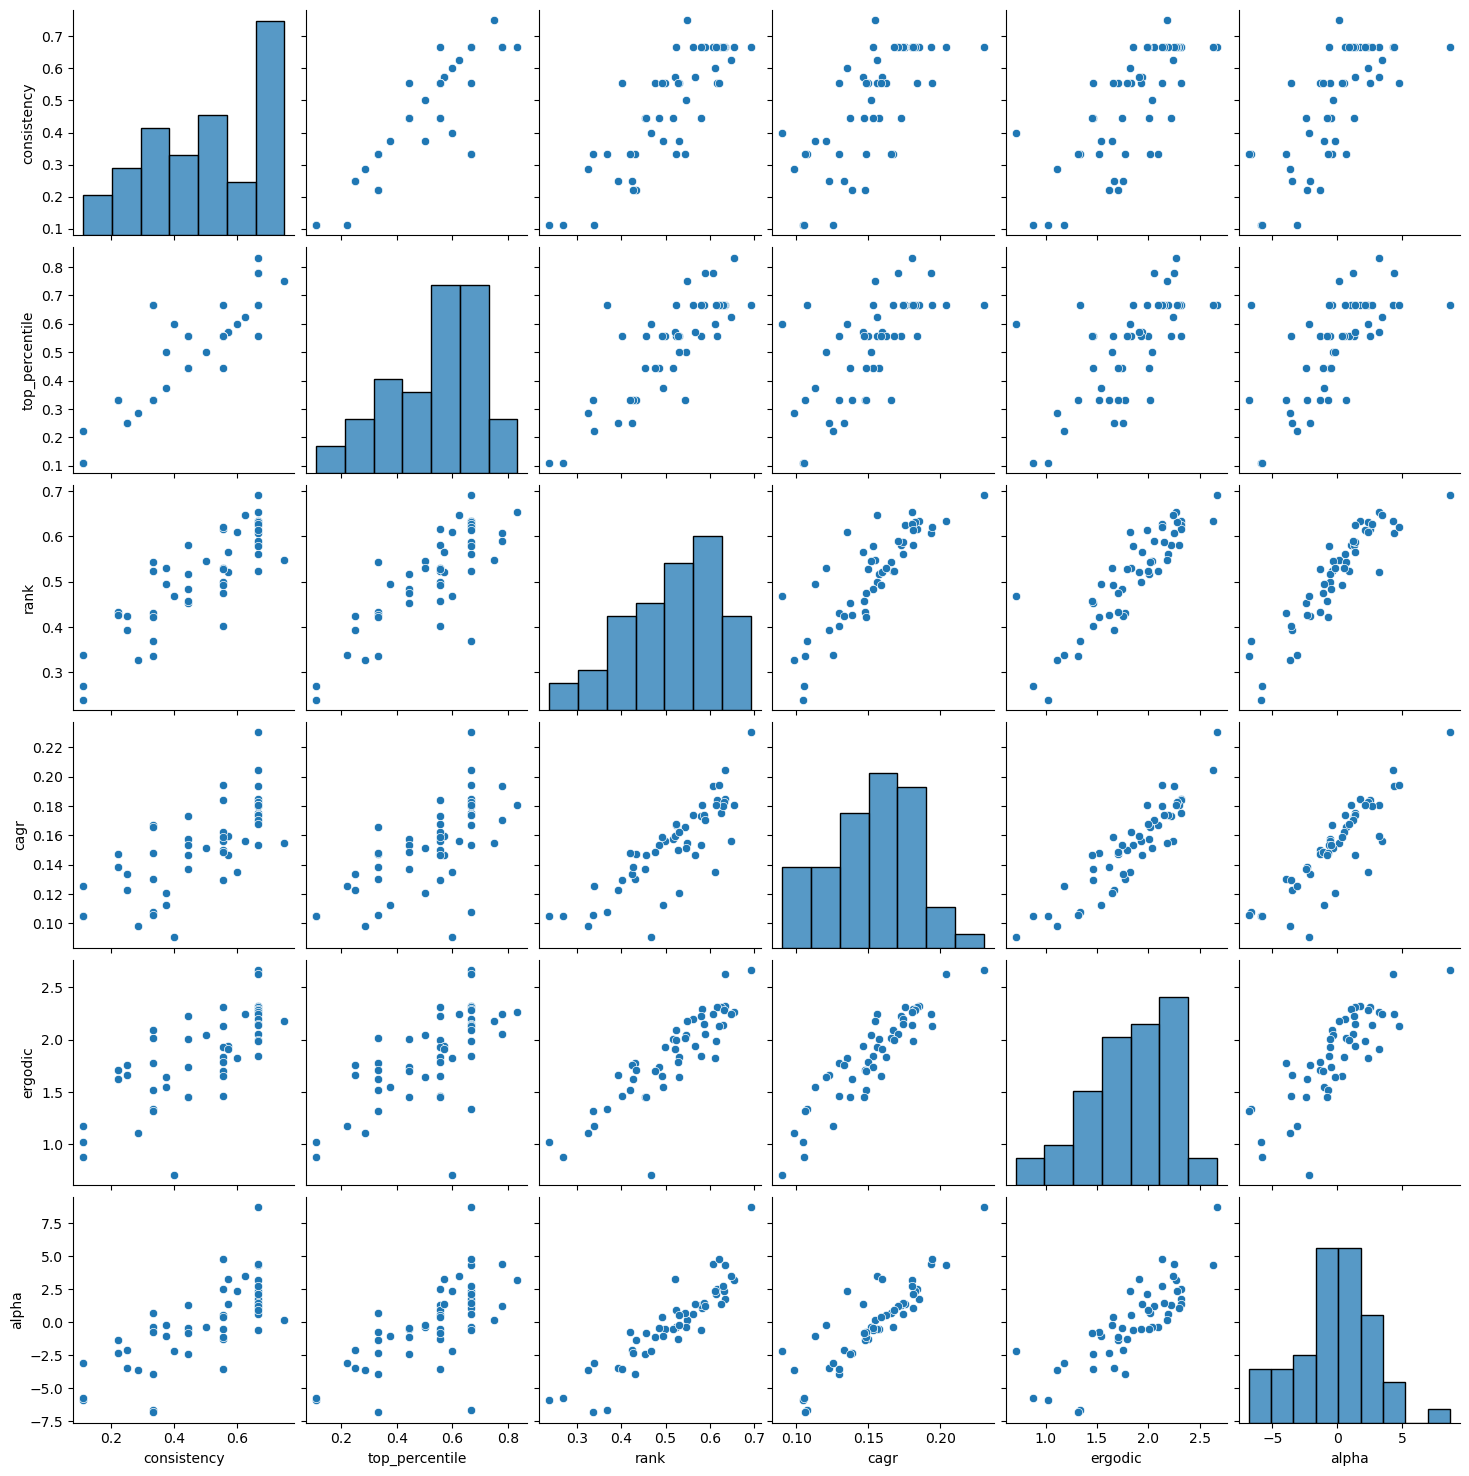

In [86]:
sns.pairplot(all_metrics)

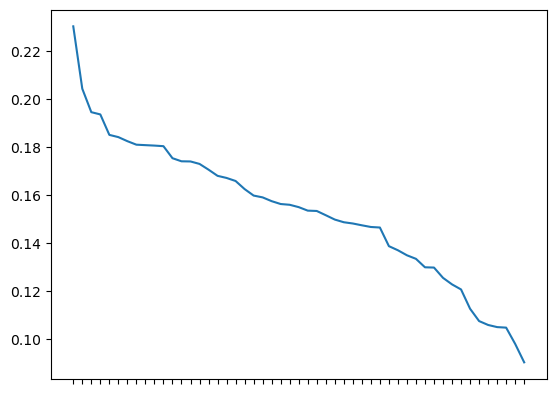

In [87]:
# dfdm.sum(axis=1).sort_values(ascending=False).plot()
plt.plot(cagr.sort_values(ascending=False))
plt.xticks(np.arange(len(dfdm)), [])
plt.show()

A colorful plot to end.

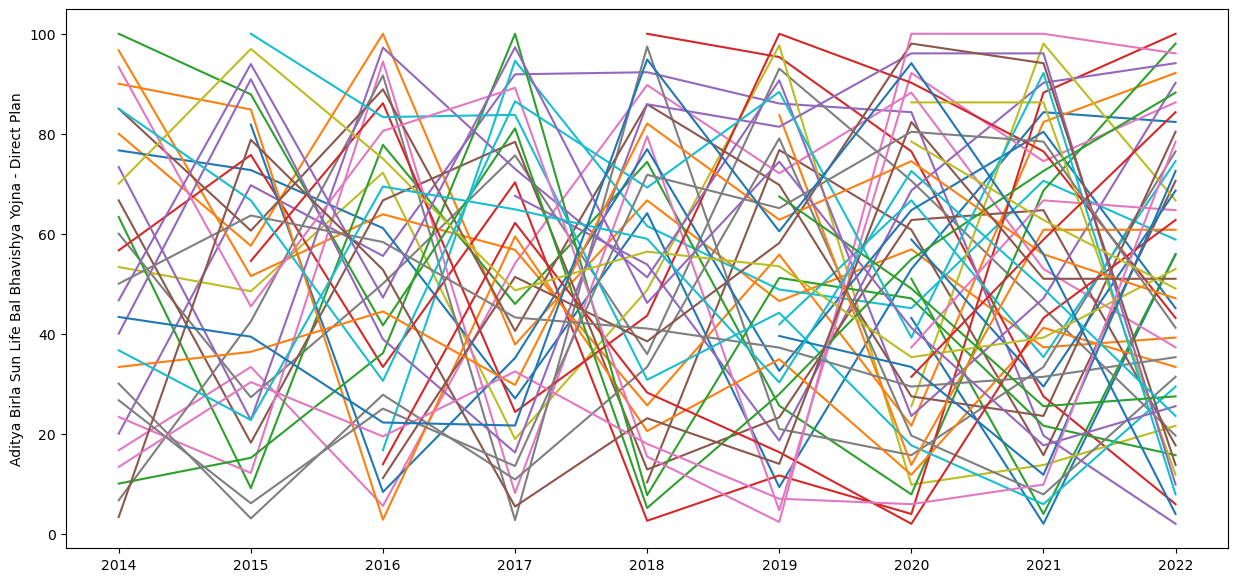

In [88]:
plt.figure(figsize=(15,7), dpi=100)
for index, row in dfdr.iloc[:, :-1].iterrows():
    sns.lineplot(data=row)